In [0]:
import cv2
import matplotlib.pyplot as plt
import PIL
import numpy as np
from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_fill_holes

from os import listdir
from os.path import isfile, join
from tqdm import tqdm

In [2]:
#mount colab drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
CT_DATA_FOLDER = '/content/drive/My Drive/DLMI Project/Data/CT_slices_registered'
CT_DATA_TGT_FOLDER = '/content/drive/My Drive/DLMI Project/Data/CT_slices_registered_clean'

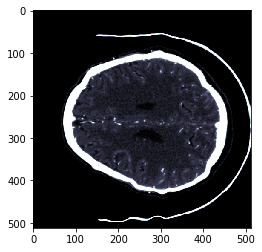

In [4]:
sample = cv2.imread(f'{CT_DATA_FOLDER}/slide_173.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(sample, cmap='bone')

In [0]:
def remove_artefact(img_ref, img, threshold = 200):
  """
  remove artefact on CT image
  """
  img_shape = np.array(img_ref.shape)
  mask = binary_erosion((img_ref > threshold).astype(np.uint8), iterations=4)
  #plt.figure()
  #plt.imshow(mask, cmap='bone')
  mask = binary_dilation(mask, iterations=35)
  #plt.figure()
  #plt.imshow(mask, cmap='bone')
  mask = binary_fill_holes(mask)
  #plt.figure()
  #plt.imshow(mask, cmap='bone')
  #plt.axis('off')

  
  result = cv2.bitwise_and(img, img, mask = mask.astype(np.uint8))
  return result

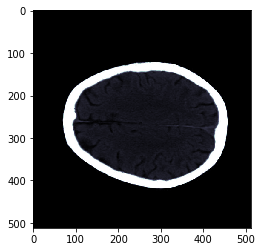

In [10]:
r = remove_artefact(cv2.imread(f'{CT_DATA_FOLDER}/slide_0.png', cv2.IMREAD_GRAYSCALE), 
                    cv2.imread(f'{CT_DATA_FOLDER}/slide_211.png', cv2.IMREAD_GRAYSCALE))

plt.imshow(r, cmap='bone')


In [0]:
ref = cv2.imread(f'{CT_DATA_FOLDER}/slide_0.png', cv2.IMREAD_GRAYSCALE)

for file in tqdm([f for f in listdir(CT_DATA_FOLDER) if isfile(join(CT_DATA_FOLDER, f))]):
    current = cv2.imread(f'{CT_DATA_FOLDER}/{file}', cv2.IMREAD_GRAYSCALE)
    r = remove_artefact(ref, current)
    j = PIL.Image.fromarray(r)
    j.save(f'{CT_DATA_TGT_FOLDER}/{file}')

100%|██████████| 742/742 [02:48<00:00,  3.06it/s]
